In [1]:
from matplotlib import pylab

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#Import dataset
car_file = 'CAR DETAILS FROM CAR DEKHO.csv'
df_used_cars = pd.read_csv(car_file)
display(df_used_cars.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df_used_cars.shape

(4340, 8)

In [5]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
columns = list(df_used_cars.columns)
print(columns)

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [7]:
#Checking for missing values
np.sum(df_used_cars.isnull())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<b>Exploratory Data Analysis(EDA)</b>

In [8]:
#Categorical columns
categoricals = [i for i in df_used_cars.columns if df_used_cars.dtypes[i] == 'object']
print("Categorical Columns are: ", *categoricals, sep = '\n')

Categorical Columns are: 
name
fuel
seller_type
transmission
owner


In [9]:
#Numerical columns
numericals = [i for i in df_used_cars.columns if df_used_cars.dtypes[i] != 'object']
print("Numerical Columns are: ", *numericals, sep = '\n')

Numerical Columns are: 
year
selling_price
km_driven


In [10]:
#Identifying unique values
df_used_cars.nunique(axis=0)

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

<Figure size 864x720 with 0 Axes>

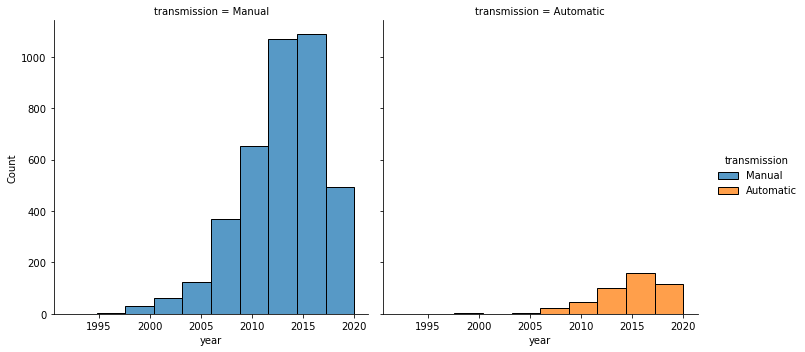

In [13]:
#Distribution of car year by transmission
plt.figure(figsize = (12,10))
sns.displot(data=df_used_cars, x="year", hue="transmission", col="transmission", bins=10)

Used cars with manual transmission made between 2010 and 2017 had the highest sales.
For cars with automatic transmission, most sold were used cars made between 2014 and 2017.

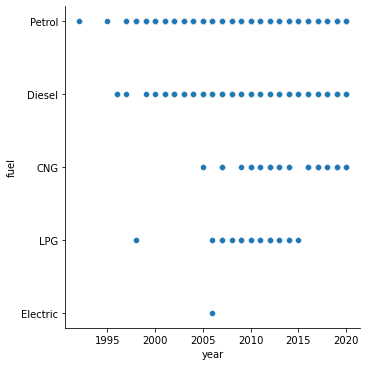

In [12]:
#Relationship between fuel type and car year
sns.relplot(x='year', y='fuel', kind='scatter', data=df_used_cars)

Cars running on CNG, LPG, and electric cars were mostly made after 2005.

<b>Analysis on Categorical Attributes</b>

In [13]:
#Creating a copy of df_used_cars dataframe
copy_df= pd.concat((df_used_cars[categoricals], df_used_cars[numericals]), axis=1)
copy_df.head()

,name,fuel,seller_type,transmission,owner,year,selling_price,km_driven
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner,2007,60000,70000
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,2007,135000,50000
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,2012,600000,100000
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner,2017,250000,46000
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner,2014,450000,141000


In [19]:
#Slicing categorical columns of a dataframe
categor_df = copy_df.loc[:, 'name': 'owner']
categor_df.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


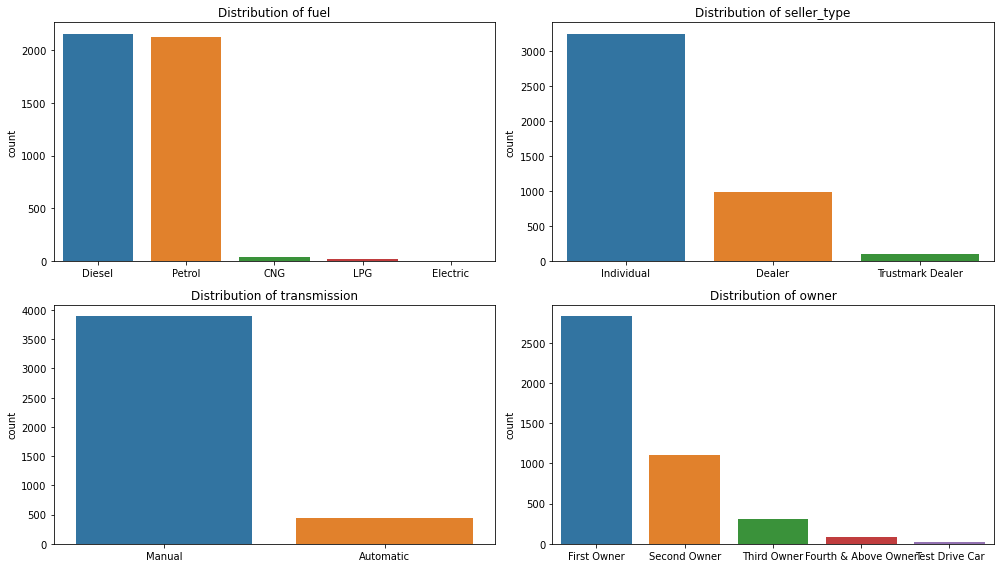

In [20]:
#Distribution for each categorical feature
fig = plt.figure(1, (14, 8))

for i,categoricals in enumerate(categor_df.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(categor_df[categoricals], order=categor_df[categoricals].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {categoricals}')
    plt.tight_layout()

plt.show()

<Figure size 720x576 with 0 Axes>

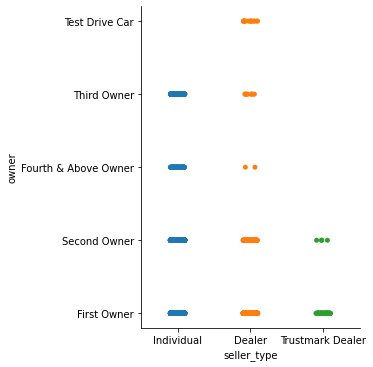

In [21]:
#Relationship between categorical variables seller_type and owner
plt.figure(figsize = (10,8))
sns.catplot(x="seller_type", y="owner", data=categor_df)
plt.show()

Dealer seller_type has all 5 types of owner.

In [26]:
df_car_name = df_used_cars.sort_values('name' , ascending=False)[:20]

In [27]:
df_car_name

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2865,Volvo XC60 D5 Inscription,2014,2000000,130000,Diesel,Individual,Automatic,First Owner
3320,Volvo XC60 D3 Kinetic,2012,1750000,115992,Diesel,Dealer,Automatic,Third Owner
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner
103,Volvo V40 D3 R Design,2018,1975000,21000,Diesel,Dealer,Automatic,First Owner
1573,Volkswagen Vento Petrol Highline AT,2011,300000,70000,Petrol,Individual,Automatic,Third Owner
717,Volkswagen Vento Petrol Highline AT,2011,269000,76259,Petrol,Dealer,Automatic,First Owner
3329,Volkswagen Vento Petrol Highline,2011,400000,60000,Petrol,Individual,Manual,First Owner
3899,Volkswagen Vento Petrol Highline,2011,350000,90000,Petrol,Individual,Manual,Second Owner
3742,Volkswagen Vento New Diesel Highline,2013,330000,120000,Diesel,Individual,Manual,Second Owner
1608,Volkswagen Vento New Diesel Highline,2012,330000,86000,Diesel,Individual,Manual,Fourth & Above Owner


<Figure size 1296x1152 with 0 Axes>

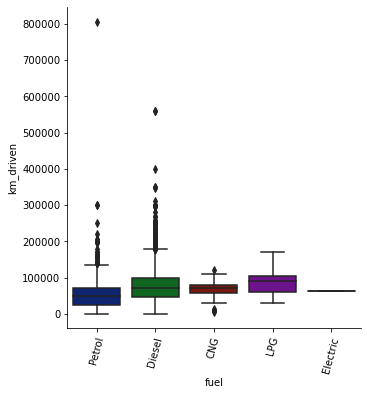

In [58]:
plt.figure(figsize=(18,16))
sns.catplot(x="fuel", y="km_driven", kind="box", data=df_used_cars)
plt.xticks(rotation=75)
plt.show()

LPG cars have the least symetric distribution and the highest median km_driven.

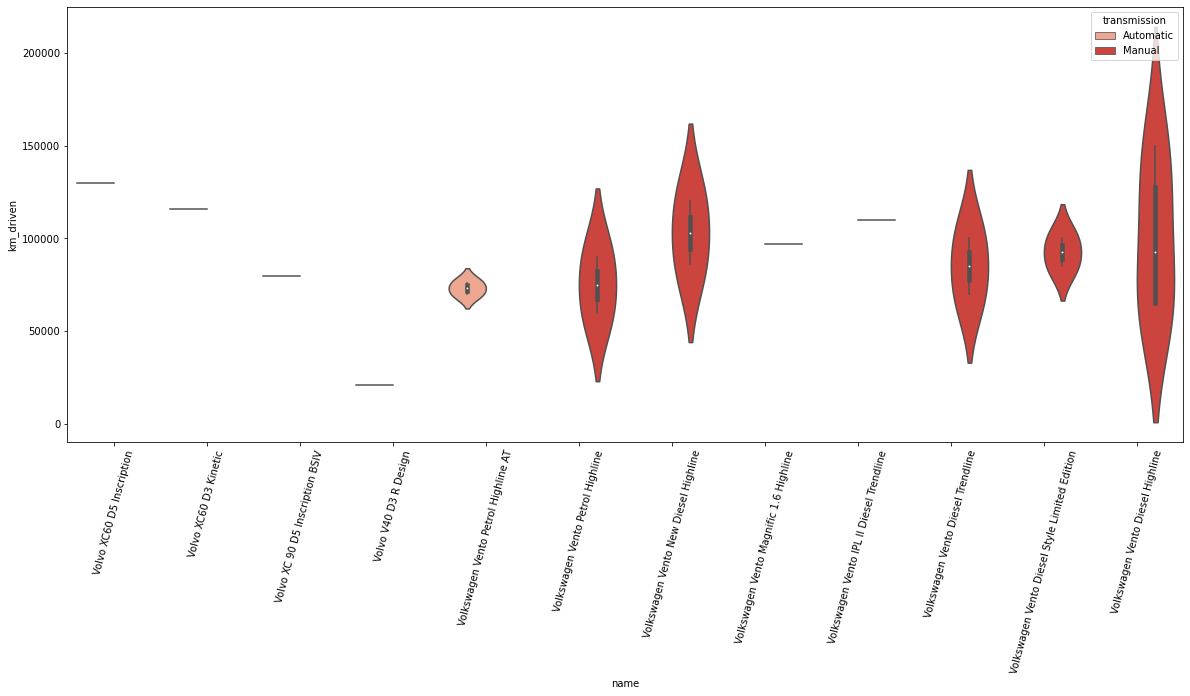

In [50]:
#Violin plot to show the relationship of car name to km_driven
plt.figure(figsize=(20,8))
sns.violinplot(data=df_car_name, x='name', y='km_driven', hue='transmission', palette = 'Reds')
plt.xticks(rotation=75)
plt.show()

The median km_driven for Volkswagen Vento Petrol Highline AT and Volkswagen Vento Petrol Highline are the same, but lower than other cars.

<b>Analysis on Numerical Attributes</b>

In [22]:
#Slice numerical columns of a dataframe
numeric_df = copy_df.loc[:, 'year':]
numeric_df.head()

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


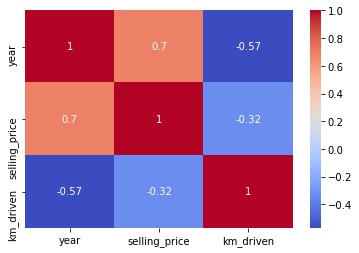

In [39]:
#Correlation heatmap
sns.heatmap(numeric_df.corr(method='spearman'), annot = True,  cmap = 'coolwarm')
plt.show()

The selling_price of a car is highly correlated with the year the car was made. Year and km_driven have stronger negative correlation than selling_price and km_driven.